In [1]:
import pandas as pd

# Paths to the datasets
training_data_34_66_path = '/data/notebook_files/training_data_34_66.csv'
training_data_10_90_path = '/data/notebook_files/training_data_10_90.csv'
X_test_path = '/data/notebook_files/X_test.csv'
y_test_path = '/data/notebook_files/y_test.csv'

# Loading the datasets
training_data_34_66 = pd.read_csv(training_data_34_66_path)
training_data_10_90 = pd.read_csv(training_data_10_90_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# LightGBM Computation on the 34:66 Class Distribution

In [2]:
X_train_34_66 = training_data_34_66.drop('Class', axis=1)
y_train_34_66 = training_data_34_66['Class']

y_test = y_test.squeeze() 

In [4]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


[LightGBM] [Info] Number of positive: 77333, number of negative: 227449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 304782, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.253732 -> initscore=-1.078805
[LightGBM] [Info] Start training from score -1.078805
Accuracy (34:66): 0.9991046662687406
Recall/Sensitivity (34:66): 0.8469387755102041
Specificity (34:66): 0.9993669105233539
Precision (34:66): 0.6974789915966386
F2 Score (34:66): 0.812133072407045
Matthews Correlation Coefficient (MCC) (34:66): 0.7681517488916981
Balanced Classification Rate (BCR) (34:66): 0.923152843016779
ROC AUC (34:66): 0.9879779394875564
Confusion Matrix (34:66):
[[56828    36]
 [   15    83]]
TN (34:66): 56828, FP (34:66): 36, FN (34:66): 15, TP (34:66): 83


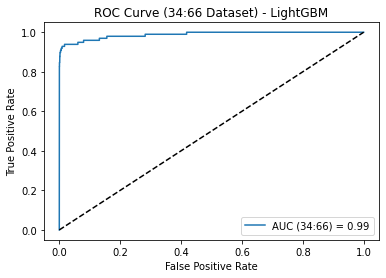

In [5]:
import lightgbm as lgb
from sklearn.metrics import (accuracy_score, recall_score, precision_score, fbeta_score,
                             roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef)
import matplotlib.pyplot as plt

# Initialize the LightGBM Classifier
lgb_model_34_66 = lgb.LGBMClassifier()

# Train the model on the 34:66 resampled training data
lgb_model_34_66.fit(X_train_34_66, y_train_34_66)

# Predict on the test set
y_pred_34_66_lgb = lgb_model_34_66.predict(X_test)
y_pred_proba_34_66_lgb = lgb_model_34_66.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_34_66_lgb = accuracy_score(y_test, y_pred_34_66_lgb)
recall_34_66_lgb = recall_score(y_test, y_pred_34_66_lgb)
precision_34_66_lgb = precision_score(y_test, y_pred_34_66_lgb)
f2_score_34_66_lgb = fbeta_score(y_test, y_pred_34_66_lgb, beta=2)
roc_auc_34_66_lgb = roc_auc_score(y_test, y_pred_proba_34_66_lgb)
conf_matrix_34_66_lgb = confusion_matrix(y_test, y_pred_34_66_lgb)
mcc_34_66_lgb = matthews_corrcoef(y_test, y_pred_34_66_lgb)

# Extracting TN, FP, FN, TP from confusion matrix
tn_34_66_lgb, fp_34_66_lgb, fn_34_66_lgb, tp_34_66_lgb = conf_matrix_34_66_lgb.ravel()

# Specificity or True Negative Rate
specificity_34_66_lgb = tn_34_66_lgb / (tn_34_66_lgb + fp_34_66_lgb)

# Balanced Classification Rate (BCR)
bcr_34_66_lgb = (recall_34_66_lgb + specificity_34_66_lgb) / 2

# Print the metrics
print(f'Accuracy (34:66): {accuracy_34_66_lgb}')
print(f'Recall/Sensitivity (34:66): {recall_34_66_lgb}')
print(f'Specificity (34:66): {specificity_34_66_lgb}')
print(f'Precision (34:66): {precision_34_66_lgb}')
print(f'F2 Score (34:66): {f2_score_34_66_lgb}')
print(f'Matthews Correlation Coefficient (MCC) (34:66): {mcc_34_66_lgb}')
print(f'Balanced Classification Rate (BCR) (34:66): {bcr_34_66_lgb}')
print(f'ROC AUC (34:66): {roc_auc_34_66_lgb}')
print(f'Confusion Matrix (34:66):\n{conf_matrix_34_66_lgb}')
print(f'TN (34:66): {tn_34_66_lgb}, FP (34:66): {fp_34_66_lgb}, FN (34:66): {fn_34_66_lgb}, TP (34:66): {tp_34_66_lgb}')

# ROC Curve
fpr_34_66_lgb, tpr_34_66_lgb, _ = roc_curve(y_test, y_pred_proba_34_66_lgb)
plt.plot(fpr_34_66_lgb, tpr_34_66_lgb, label=f'AUC (34:66) = {roc_auc_34_66_lgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (34:66 Dataset) - LightGBM')
plt.legend(loc='lower right')
plt.show()

In [6]:
from sklearn.model_selection import cross_validate, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef
import numpy as np

# Initialize the LightGBM Classifier
lgb_model_34_66 = lgb.LGBMClassifier()

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results_34_66_lgb = cross_validate(lgb_model_34_66, X_train_34_66, y_train_34_66, cv=cv_strategy, scoring=scoring, n_jobs=-1)

# Extracting scores
accuracy_scores_34_66_lgb = cv_results_34_66_lgb['test_accuracy']
recall_scores_34_66_lgb = cv_results_34_66_lgb['test_recall']
precision_scores_34_66_lgb = cv_results_34_66_lgb['test_precision']
f2_scores_34_66_lgb = cv_results_34_66_lgb['test_f2_score']
mcc_scores_34_66_lgb = cv_results_34_66_lgb['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy (34:66 - LightGBM): {np.mean(accuracy_scores_34_66_lgb)} (+/- {np.std(accuracy_scores_34_66_lgb)})')
print(f'Cross-validated recall (34:66 - LightGBM): {np.mean(recall_scores_34_66_lgb)} (+/- {np.std(recall_scores_34_66_lgb)})')
print(f'Cross-validated precision (34:66 - LightGBM): {np.mean(precision_scores_34_66_lgb)} (+/- {np.std(precision_scores_34_66_lgb)})')
print(f'Cross-validated F2 score (34:66 - LightGBM): {np.mean(f2_scores_34_66_lgb)} (+/- {np.std(f2_scores_34_66_lgb)})')
print(f'Cross-validated MCC (34:66 - LightGBM): {np.mean(mcc_scores_34_66_lgb)} (+/- {np.std(mcc_scores_34_66_lgb)})')

Cross-validated accuracy (34:66 - LightGBM): 0.9993339506412843 (+/- 8.403166588472257e-05)
Cross-validated recall (34:66 - LightGBM): 0.9995732783699014 (+/- 0.00021867427612171217)
Cross-validated precision (34:66 - LightGBM): 0.9978056694156109 (+/- 0.00025105281306831253)
Cross-validated F2 score (34:66 - LightGBM): 0.9992192377167453 (+/- 0.00018127706254647763)
Cross-validated MCC (34:66 - LightGBM): 0.9982430029149443 (+/- 0.00022167284091856963)


# LightGBM Computation on the 10:90 Class Distribution

In [7]:
X_train_10_90 = training_data_10_90.drop('Class', axis=1)
y_train_10_90 = training_data_10_90['Class']

y_test = y_test.squeeze() 

[LightGBM] [Info] Number of positive: 22745, number of negative: 227450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 250195, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090909 -> initscore=-2.302585
[LightGBM] [Info] Start training from score -2.302585
Accuracy (10:90): 0.9993679997191109
Recall/Sensitivity (10:90): 0.8469387755102041
Specificity (10:90): 0.9996306978052898
Precision (10:90): 0.7980769230769231
F2 Score (10:90): 0.8366935483870969
Matthews Correlation Coefficient (MCC) (10:90): 0.8218298014848779
Balanced Classification Rate (BCR) (10:90): 0.923284736657747
ROC AUC (10:90): 0.9852634427434451
Confusion Matrix (10:90):
[[56843    21]
 [   15    83]]
TN (10:90): 56843, FP (10:90): 21, FN (10:90): 15, TP (10:90): 83


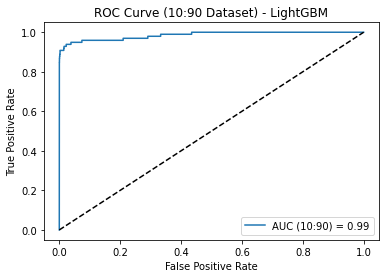

In [8]:
# Initialize the LightGBM Classifier for the 10:90 class distribution
lgb_model_10_90 = lgb.LGBMClassifier()

# Train the model on the 10:90 resampled training data
lgb_model_10_90.fit(X_train_10_90, y_train_10_90)

# Predict on the test set
y_pred_10_90_lgb = lgb_model_10_90.predict(X_test)
y_pred_proba_10_90_lgb = lgb_model_10_90.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_10_90_lgb = accuracy_score(y_test, y_pred_10_90_lgb)
recall_10_90_lgb = recall_score(y_test, y_pred_10_90_lgb)
precision_10_90_lgb = precision_score(y_test, y_pred_10_90_lgb)
f2_score_10_90_lgb = fbeta_score(y_test, y_pred_10_90_lgb, beta=2)
roc_auc_10_90_lgb = roc_auc_score(y_test, y_pred_proba_10_90_lgb)
conf_matrix_10_90_lgb = confusion_matrix(y_test, y_pred_10_90_lgb)
mcc_10_90_lgb = matthews_corrcoef(y_test, y_pred_10_90_lgb)

# Extracting TN, FP, FN, TP from confusion matrix
tn_10_90_lgb, fp_10_90_lgb, fn_10_90_lgb, tp_10_90_lgb = conf_matrix_10_90_lgb.ravel()

# Specificity or True Negative Rate
specificity_10_90_lgb = tn_10_90_lgb / (tn_10_90_lgb + fp_10_90_lgb)

# Balanced Classification Rate (BCR)
bcr_10_90_lgb = (recall_10_90_lgb + specificity_10_90_lgb) / 2

# Print the metrics
print(f'Accuracy (10:90): {accuracy_10_90_lgb}')
print(f'Recall/Sensitivity (10:90): {recall_10_90_lgb}')
print(f'Specificity (10:90): {specificity_10_90_lgb}')
print(f'Precision (10:90): {precision_10_90_lgb}')
print(f'F2 Score (10:90): {f2_score_10_90_lgb}')
print(f'Matthews Correlation Coefficient (MCC) (10:90): {mcc_10_90_lgb}')
print(f'Balanced Classification Rate (BCR) (10:90): {bcr_10_90_lgb}')
print(f'ROC AUC (10:90): {roc_auc_10_90_lgb}')
print(f'Confusion Matrix (10:90):\n{conf_matrix_10_90_lgb}')
print(f'TN (10:90): {tn_10_90_lgb}, FP (10:90): {fp_10_90_lgb}, FN (10:90): {fn_10_90_lgb}, TP (10:90): {tp_10_90_lgb}')

# ROC Curve
fpr_10_90_lgb, tpr_10_90_lgb, _ = roc_curve(y_test, y_pred_proba_10_90_lgb)
plt.plot(fpr_10_90_lgb, tpr_10_90_lgb, label=f'AUC (10:90) = {roc_auc_10_90_lgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (10:90 Dataset) - LightGBM')
plt.legend(loc='lower right')
plt.show()

In [10]:
from sklearn.model_selection import cross_validate, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef
import numpy as np

lgb_model_10_90 = lgb.LGBMClassifier()

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results_10_90_lgb = cross_validate(lgb_model_10_90, X_train_10_90, y_train_10_90, cv=cv_strategy, scoring=scoring, n_jobs=-1)

# Extracting scores
accuracy_scores_10_90_lgb = cv_results_10_90_lgb['test_accuracy']
recall_scores_10_90_lgb = cv_results_10_90_lgb['test_recall']
precision_scores_10_90_lgb = cv_results_10_90_lgb['test_precision']
f2_scores_10_90_lgb = cv_results_10_90_lgb['test_f2_score']
mcc_scores_10_90_lgb = cv_results_10_90_lgb['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy (10:90 - LightGBM): {np.mean(accuracy_scores_10_90_lgb)} (+/- {np.std(accuracy_scores_10_90_lgb)})')
print(f'Cross-validated recall (10:90 - LightGBM): {np.mean(recall_scores_10_90_lgb)} (+/- {np.std(recall_scores_10_90_lgb)})')
print(f'Cross-validated precision (10:90 - LightGBM): {np.mean(precision_scores_10_90_lgb)} (+/- {np.std(precision_scores_10_90_lgb)})')
print(f'Cross-validated F2 score (10:90 - LightGBM): {np.mean(f2_scores_10_90_lgb)} (+/- {np.std(f2_scores_10_90_lgb)})')
print(f'Cross-validated MCC (10:90 - LightGBM): {np.mean(mcc_scores_10_90_lgb)} (+/- {np.std(mcc_scores_10_90_lgb)})')

Cross-validated accuracy (10:90 - LightGBM): 0.999112692100162 (+/- 0.00021693905545854385)
Cross-validated recall (10:90 - LightGBM): 0.9942404924159156 (+/- 0.0017717688880729773)
Cross-validated precision (10:90 - LightGBM): 0.9959923601143815 (+/- 0.0010265182882995508)
Cross-validated F2 score (10:90 - LightGBM): 0.9945899444082149 (+/- 0.0015162894681600419)
Cross-validated MCC (10:90 - LightGBM): 0.9946278857673218 (+/- 0.0013159721840820561)
